In [1]:
#Iris Flower Classification

In [2]:
##importing all the required libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('IRIS_dataset.csv')

In [4]:
iris = df.copy()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()
iris.species.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\ravik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ravik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ravik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ravik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 800x600 with 0 Axes>

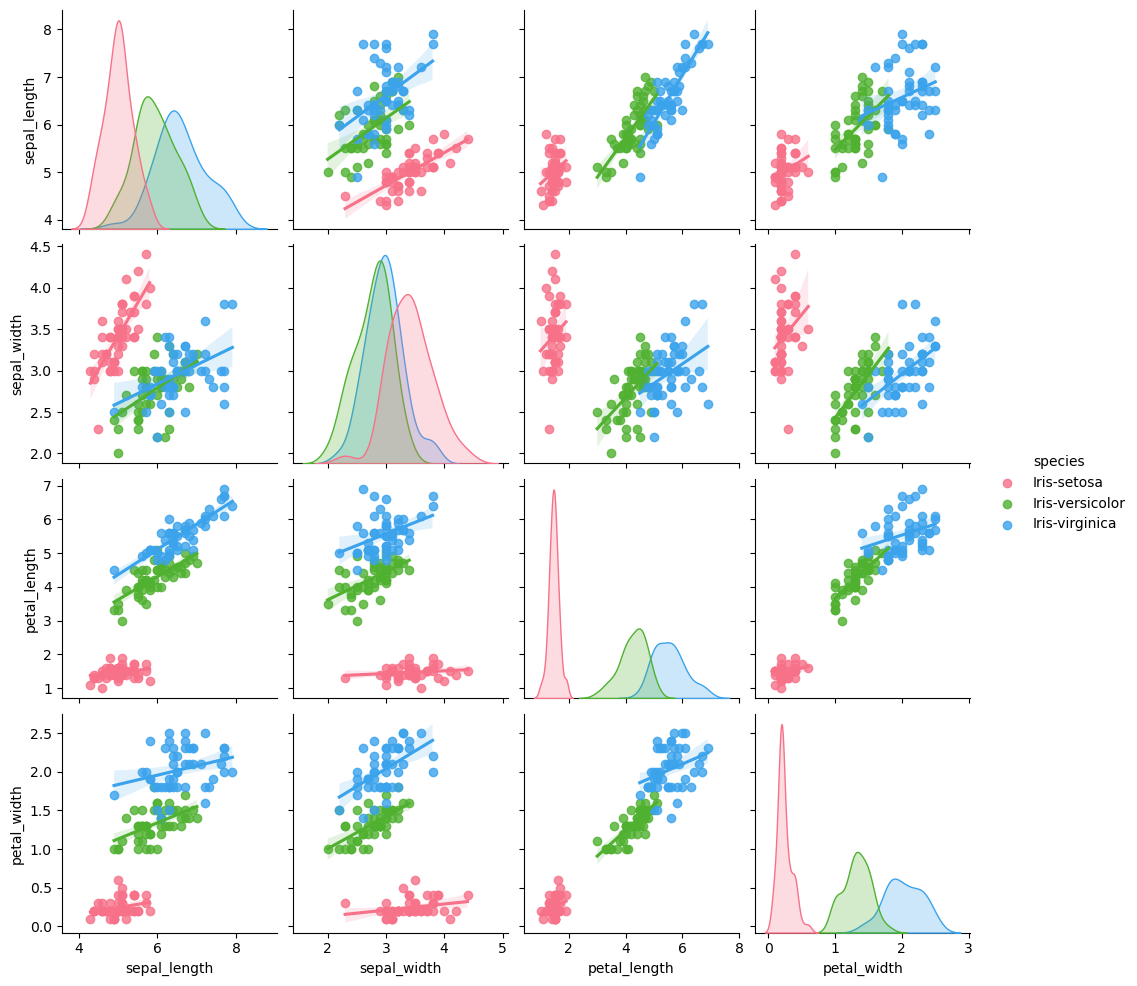

In [7]:
##visualizing the data
plt.figure(figsize=(8,6));
sns.pairplot(iris,kind='reg',hue ='species',palette="husl" );

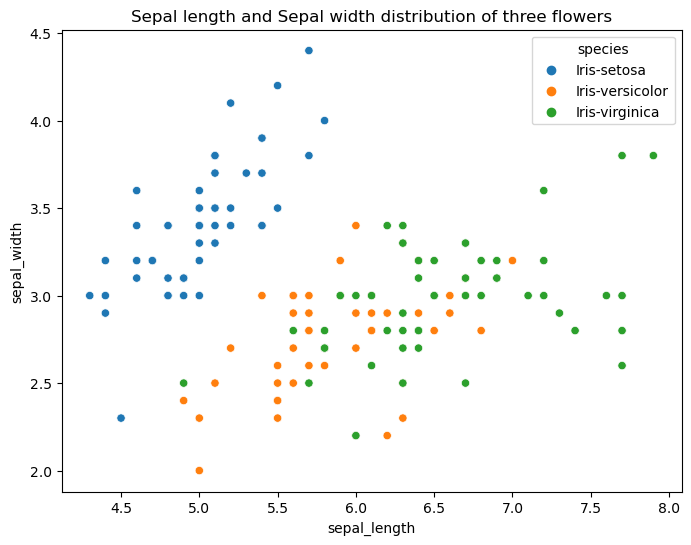

In [8]:
plt.figure(figsize=(8,6));
sns.scatterplot(x=iris.sepal_length,y=iris.sepal_width,hue=iris.species).set_title("Sepal length and Sepal width distribution of three flowers");

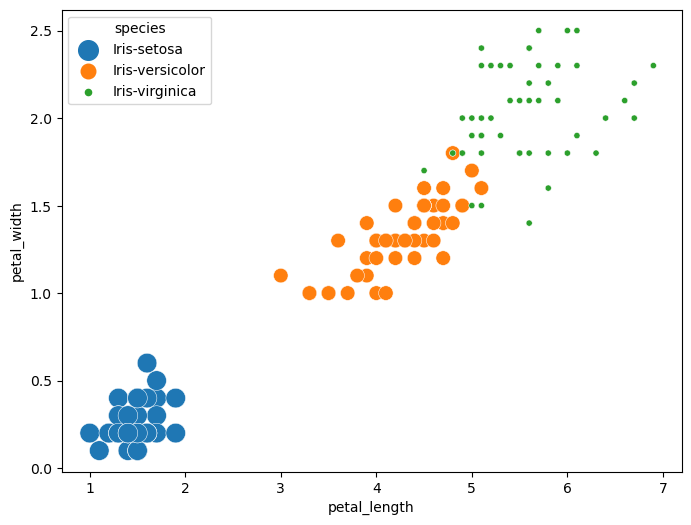

In [13]:
plt.figure(figsize=(8,6));
cmap = sns.cubehelix_palette(dark=.5, light=.9, as_cmap=True)
ax = sns.scatterplot(x="petal_length", y="petal_width",hue="species",size="species",sizes=(20,200),legend="full",data=iris);

In [14]:
#Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
iris['species'] = lb_make.fit_transform(iris['species'])
iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
72,6.3,2.5,4.9,1.5,1
85,6.0,3.4,4.5,1.6,1
17,5.1,3.5,1.4,0.3,0


In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [17]:
y = iris.species
X = iris.drop('species',axis = 1)
from sklearn.model_selection import KFold,train_test_split,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [19]:
#KNN modeling
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred = knn.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [23]:
# Accuracy
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.9777777777777777
